# Task 3: - MOVIE RATING PREDICTION

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Loading the dataset

In [2]:
# Load the dataset
df = pd.read_csv('IMDb Movies India.csv', encoding='latin1')

In [3]:
# Display the first few rows of the dataset
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                         #Homecoming -2021.0   90 min   Drama, Musical   
3                             #Yaaram -2019.0  110 min  Comedy, Romance   
4                   ...And Once Again -2010.0  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [4]:
# Exploratory Data Analysis (EDA)
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
None


In [5]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
          Name          Year Duration  Genre       Rating Votes      Director  \
count    15509  14981.000000     7240  13632  7919.000000  7920         14984   
unique   13838           NaN      182    485          NaN  2034          5938   
top     Anjaam           NaN  120 min  Drama          NaN     8  Jayant Desai   
freq         7           NaN      240   2780          NaN   227            58   
mean       NaN  -1987.012215      NaN    NaN     5.841621   NaN           NaN   
std        NaN     25.416689      NaN    NaN     1.381777   NaN           NaN   
min        NaN  -2022.000000      NaN    NaN     1.100000   NaN           NaN   
25%        NaN  -2009.000000      NaN    NaN     4.900000   NaN           NaN   
50%        NaN  -1991.000000      NaN    NaN     6.000000   NaN           NaN   
75%        NaN  -1968.000000      NaN    NaN     6.800000   NaN           NaN   
max        NaN  -1913.000000      NaN    NaN    10.000000   NaN           NaN   

      

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [7]:
# Checking the shape of the data
df.shape

(15509, 10)

### Data Preprocessing

In [8]:
# Drop rows with missing values in relevant columns
df.dropna(subset=['Year', 'Duration', 'Genre', 'Rating', 'Votes'], inplace=True)

In [9]:
# Check for missing values
df.isnull().sum()

Name          0
Year          0
Duration      0
Genre         0
Rating        0
Votes         0
Director      1
Actor 1      74
Actor 2     115
Actor 3     161
dtype: int64

In [10]:
# Convert 'Year' to numeric and handle negative values (assuming they are placeholder for unknown year)
df['Year'] = df['Year'].apply(lambda x: int(x.replace('-', '')) if isinstance(x, str) else x)

In [11]:
# Convert 'Votes' to numeric (remove commas)
df['Votes'] = df['Votes'].replace(',', '', regex=True).astype(int)

In [12]:
# Convert 'Duration' to numeric (remove min)
df['Duration'] = df['Duration'].replace(' min', '', regex=True).astype(int)

In [13]:
# Extract relevant features and target
X = df[['Year', 'Duration', 'Votes', 'Genre']]
y = df['Rating']

In [14]:
# One-hot encode 'Genre' feature
X_encoded = pd.get_dummies(X, columns=['Genre'], drop_first=True)

In [15]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [16]:
# Standardizing the features (for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Defining the models and Evaluating

In [17]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    # 'Support Vector Regression': SVR(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}


Linear Regression:
Mean Squared Error: 3815200532499.52
R-squared: -2045544339124.53


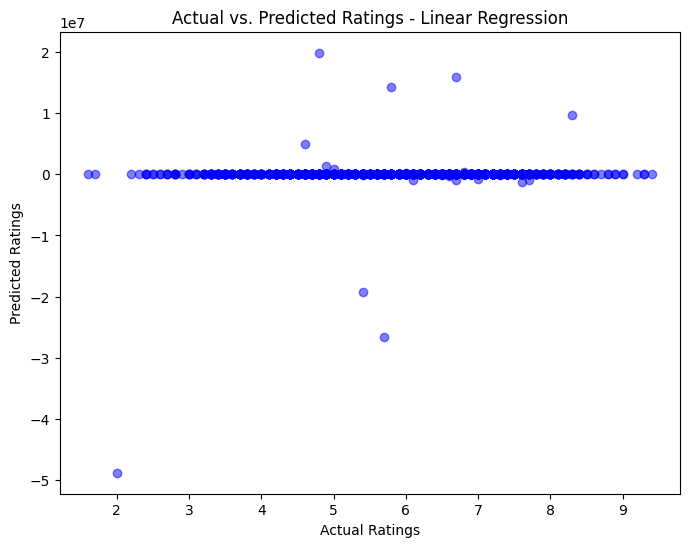


Ridge Regression:
Mean Squared Error: 1.61
R-squared: 0.13


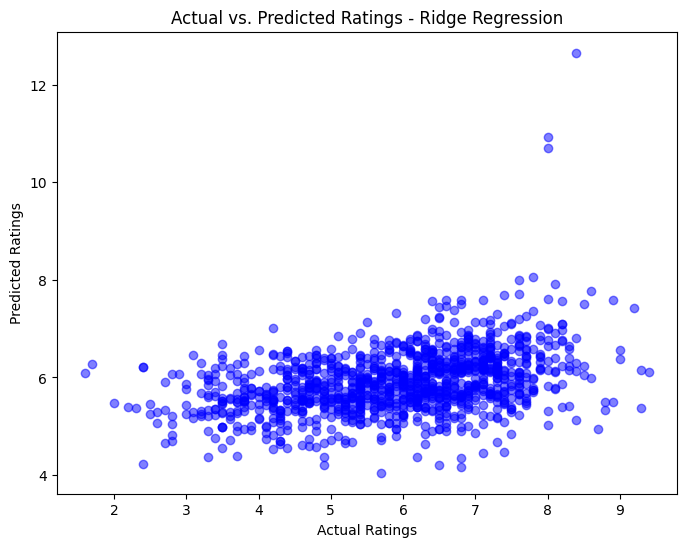


Lasso Regression:
Mean Squared Error: 1.73
R-squared: 0.08


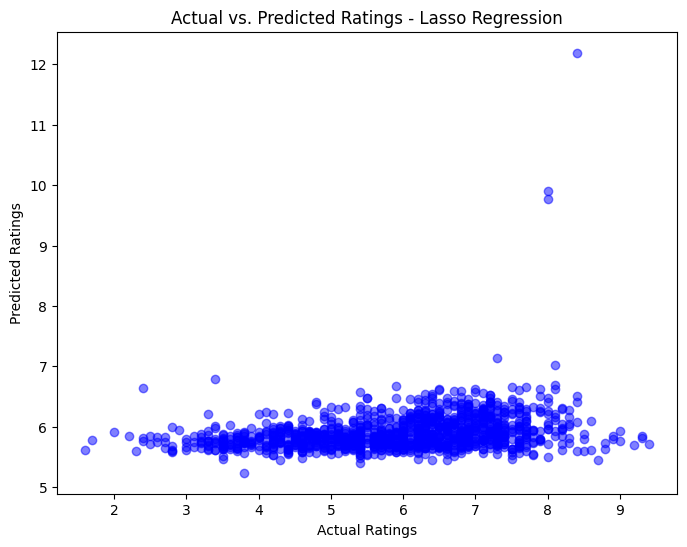


Random Forest Regression:
Mean Squared Error: 1.25
R-squared: 0.33


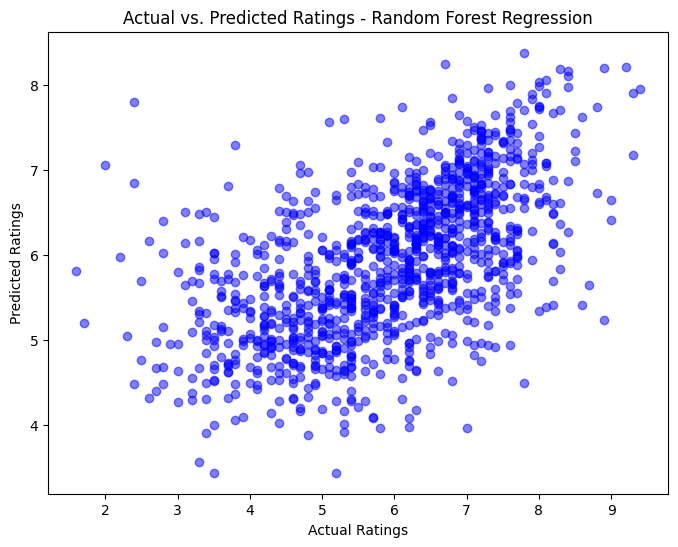


Gradient Boosting Regression:
Mean Squared Error: 1.26
R-squared: 0.32


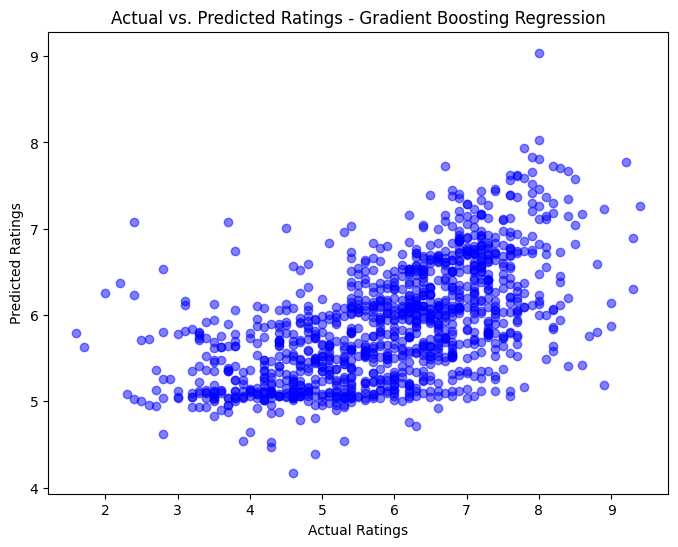

In [18]:
# Model training and evaluation
for name, model in models.items():
    if name == 'Support Vector Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Model evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'\n{name}:')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')
    
    # Visualize predicted vs. actual ratings
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.xlabel('Actual Ratings')
    plt.ylabel('Predicted Ratings')
    plt.title(f'Actual vs. Predicted Ratings - {name}')
    plt.show()